<a href="https://colab.research.google.com/github/Nacho2904/CURSO-LEARNING1/blob/tareas/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión logística

## Setup

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

## Parcialitos

- 1) Usando "loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)", programar
con keras el GD. Indicar el learning rate, el patience del early stopping y el riesgo empírico finalmente alcanzado.

In [ ]:
!wget https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt

--2022-09-10 20:13:30--  https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/parcialitos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘parcialitos.txt’

parcialitos.txt     100%[===================>]   3.69K  --.-KB/s    in 0s      

2022-09-10 20:13:30 (70.0 MB/s) - ‘parcialitos.txt’ saved [3775/3775]



In [ ]:
dataset = pd.read_table("parcialitos.txt", sep=',',header=None)
dataset.columns = ["nota_primer_parcialito", "nota_segundo_parcialito", "aprobo"]
dataset.head()

,nota_primer_parcialito,nota_segundo_parcialito,aprobo
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
inputs = np.array(dataset[["nota_primer_parcialito", "nota_segundo_parcialito"]])
targets = np.array(dataset["aprobo"]).reshape(len(dataset),1)
scaler = preprocessing.StandardScaler().fit(inputs)
norm_inputs = scaler.transform(inputs)

In [ ]:
model_parcialitos = tf.keras.Sequential()
model_parcialitos.add(tf.keras.layers.Dense(1, input_dim=2))
#entrenamos el modelo
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model_parcialitos.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                          metrics=["accuracy"])
hist = model_parcialitos.fit(x=norm_inputs, y=targets, batch_size = len(dataset), epochs=100000,callbacks=[early_stop]);

Epoch 1/100000
1/1 [==============================] - 1s 533ms/step - loss: 0.8343 - accuracy: 0.5400
Epoch 2/100000
1/1 [==============================] - 0s 10ms/step - loss: 0.7383 - accuracy: 0.5700
Epoch 3/100000
1/1 [==============================] - 0s 14ms/step - loss: 0.6600 - accuracy: 0.6100
Epoch 4/100000
1/1 [==============================] - 0s 15ms/step - loss: 0.5967 - accuracy: 0.6300
Epoch 5/100000
1/1 [==============================] - 0s 7ms/step - loss: 0.5456 - accuracy: 0.6700
Epoch 6/100000
1/1 [==============================] - 0s 8ms/step - loss: 0.5043 - accuracy: 0.7300
Epoch 7/100000
1/1 [==============================] - 0s 14ms/step - loss: 0.4708 - accuracy: 0.7900
Epoch 8/100000
1/1 [==============================] - 0s 10ms/step - loss: 0.4433 - accuracy: 0.8000
Epoch 9/100000
1/1 [==============================] - 0s 13ms/step - loss: 0.4207 - accuracy: 0.8000
Epoch 10/100000
1/1 [==============================] - 0s 8ms/step - loss: 0.4019 - accuracy

- 2) El comando compile puede recibir, a demás de optimizer y loss, métricás adicionales. Incorpore "metrics=[’accuracy’]” al mismo e indique el porcentaje de predicciones correctas con el conjunto de train (el único que hay) una vez finalizado el
entrenamiento. (hecho arriba)
- 3) Grafique el riesgo empírico y el porcentaje de clasificaciones correctas en función
de los epochs.

- learning rate = 0.5
- patience = 1 (por ahora)
- empiric risk = 0.2035

In [ ]:
losses = np.array(hist.history['loss'])
accuracy = np.array(hist.history['accuracy'])

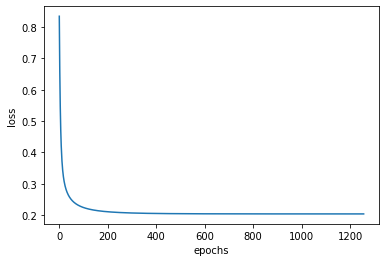

In [ ]:
x_axis = np.arange(0,len(losses),1)
sns.lineplot(x=x_axis,y=losses)
plt.xlabel("epochs")
plt.ylabel("loss");

''

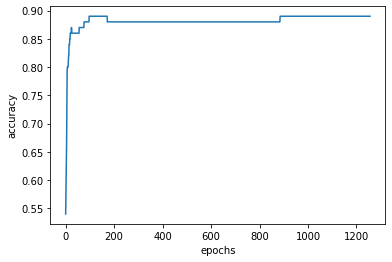

In [ ]:
x_axis = np.arange(0,len(losses),1)
sns.lineplot(x=x_axis,y=accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
;

- 4) Predecir si un estudiante con notas de (63, 55) va a aprobar.

In [ ]:
y_prob = model_parcialitos.predict(scaler.transform([[63,55]])) 
int(y_prob > 0)

0

Ergo, el nuestra predicción nos dice que el alumno no va a aprobar

- 5) Hacer un scatter plot con los datos, ploteando las dos clases con colores diferentes
y denotanto las etiquetas en el gráfico. Superponer sobre el mismo la frontera de
decisión.

In [ ]:
w,b = model_parcialitos.get_weights()
w

array([[3.9601705],
       [3.6935747]], dtype=float32)

In [ ]:
denormalize = lambda x,mu,sigma: sigma*x + mu
mu_nota_1 = np.mean(dataset["nota_primer_parcialito"])
mu_nota_2 = np.mean(dataset["nota_segundo_parcialito"])
sigma_nota_1 = np.std(dataset["nota_primer_parcialito"])
sigma_nota_2 = np.std(dataset["nota_primer_parcialito"])

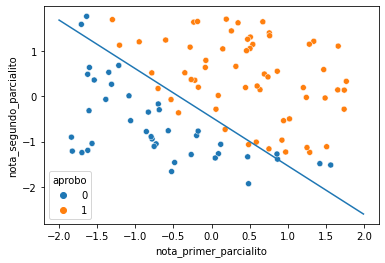

In [ ]:
dataset_norm = dataset.copy()
dataset_norm[["nota_primer_parcialito", "nota_segundo_parcialito"]] = norm_inputs
x_2 = lambda x_1: float(-(w[0]*x_1 + b)/w[1])
x_axis = np.arange(-2,2,0.01)
y_axis = np.array([x_2(x_1) for x_1 in x_axis])
sns.lineplot(x=x_axis, y=y_axis)
sns.scatterplot( x="nota_primer_parcialito", y="nota_segundo_parcialito", data=dataset_norm, hue='aprobo')

## Glass

En una escena del crimen, un vidrio dejado puede usarse como evidencia... ¡si se iden-
tifica correctamente! Clasificar a donde pertenecía el vidrio a partir de la concentración
de los diferentes elementos químicos que posee. Las clases de vidrio posibles son:
- 1. building windows float processed
- 2. building windows non float processed
- 3. vehicle windows float processed
- 4. vehicle windows non float processed
- 5. containers
- 6. tableware
- 7. headlamps

#### 1. Curado de datos

Observar bien los labels de este dataset y acomodarlo para que
keras lo interprete correctamente.

In [ ]:
url = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
dataset_glass = pd.read_csv(url)
dataset_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
dataset_glass["Type"].unique()

array([1, 2, 3, 5, 6, 7])

Notamos que no tenemos ningún ejemplo del tipo 4. Eliminamos dicho tipo porque no conocemos sus características


In [ ]:
dataset_glass["Type"].loc[dataset_glass["Type"] == 5] = 4
dataset_glass["Type"].loc[dataset_glass["Type"] == 6] = 5
dataset_glass["Type"].loc[dataset_glass["Type"] == 7] = 6
#dataset_glass["Type"] = dataset_glass["Type"].astype("category")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
dataset_glass["Type"].unique()

array([1, 2, 3, 4, 5, 6])

#### 2.

Pensar cuantos parámetros se necesitarán para resolver esta tarea con una activación softmax. Crear el modelo y chequear con el comando summary que efectivamente se haya construido el modelo deseado.

La función *softmax* para el label $i$-ésimo se define como:
- *softmax*$(z)_i = \frac{e^{-z_i}}{\sum_{j=1}^K e^{-z_j}}$

Donde $K$ es el número de clases. En particular, en el contexto de nuestra regresión logística:
- $\hat{P}(y|x) = \frac{e^{w_y^Tx +b_y}}{\sum_{j=1}^k e^{w_{y_j}^Tx + b_{y_j}}}$

Teniendo en cuenta que en nuestro caso $x \in \mathbb{R}^9$, entonces está claro que cada $w_y \in \mathbb{R}^9$, así que necesitamos $(9+1)*6 = 60$ parámetros

In [ ]:
model_glass = tf.keras.Sequential()
model_glass.add(tf.keras.layers.Dense(6, input_dim=9, activation="softmax"))
model_glass.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6)                 60        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


#### 3.

Usando "loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)",
programar con keras el GD. Indicar el learning rate, el patience del early stopping,
el riesgo empírico finalmente alcanzado y el correspondiente accuracy.

In [ ]:
# Normalizo los datos
data_as_array = np.array(dataset_glass)
targets = data_as_array[:,-1]
inputs = data_as_array[:,:-1]
scaler = preprocessing.StandardScaler().fit(inputs)
norm_inputs = scaler.transform(inputs)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model_glass.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=["accuracy"])
hist = model_glass.fit(x=norm_inputs, y=targets, batch_size = len(dataset_glass), epochs=1000,callbacks=[early_stop]);

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


InvalidArgumentError: ignored

**Arreglar esto luego!!!**

## Próstata

### 1. Curado de datos

 - Quitar todos los datos sin etiquetar.

In [ ]:
url_data = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"
url_labels = "https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
df_prostata_data = pd.read_csv(url_data)
df_prostata_labels = pd.read_csv(url_labels)                               

In [ ]:
df_prostata_data.head()

,Unnamed: 0,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.56_295.2266m/z,9.56_688.4019n,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n
0,20210420_019,87.019471,40.536483,181.357172,546.869445,45.077911,166.800421,263.926834,115.441345,947.994037,...,60.962114,685.861727,370.328128,435.448570,63.767304,165.116329,1306.746525,76.319880,556.706199,447.573857
1,20210420_021,68.644252,42.535985,172.770981,536.750237,36.602159,153.598451,254.598889,107.942448,904.809333,...,55.846733,703.085938,378.748131,436.822593,60.620782,162.477708,1280.568352,74.833557,559.765555,448.057678
2,20210420_023,85.310770,37.775988,181.641203,547.007455,43.492033,168.435256,245.294072,115.644288,948.623283,...,59.841452,667.091289,369.317188,435.448730,63.080944,165.063880,1306.559848,76.300135,548.904251,435.762433
3,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,86.486659,1490.285661,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910
4,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,85.579748,1051.535354,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122


In [ ]:
df_prostata_labels.head()

,Unnamed: 0,class
0,20210420_019,NaN
1,20210420_021,NaN
2,20210420_023,NaN
3,20210420_025,healthy
4,20210420_027,healthy


Quedó mal el nombre de la columna que posee el número identificatorio del paciente. Arreglamos eso en ambos

In [ ]:
df_prostata_data = df_prostata_data.rename(columns={"Unnamed: 0":"id"})
df_prostata_labels = df_prostata_labels.rename(columns={"Unnamed: 0":"id"})

Ya arriba también confirmamos que hay pacientes que no tienen label. Filtramos dichos pacientes de la tabla de labels, y luego unimos ambas unimos ambas tablas de forma que solo preserve los pacientes que se encuentren propiamente clasificados

In [ ]:
df_prostata_labels_filtered = df_prostata_labels[df_prostata_labels["class"].notnull()]
df_prostata_labels_filtered

,id,class
3,20210420_025,healthy
4,20210420_027,healthy
5,20210420_029,cancer
6,20210420_031,cancer
7,20210420_033,post-surgery
...,...,...
569,20210714_041,benign
570,20210714_043,cancer
571,20210714_045,benign
573,20210714_049,benign


In [ ]:
df_prostata_labeled_data = df_prostata_data.merge(df_prostata_labels_filtered, how="inner", on="id" )
df_prostata_labeled_data

,id,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.56_688.4019n,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n,class
0,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,1490.285661,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910,healthy
1,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,1051.535354,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122,healthy
2,20210420_029,33.124379,1717.149354,171.340081,1002.790531,2.841494,54.081091,21.738453,24.507923,196.245242,...,700.821757,324.643771,379.044638,27.521154,34.158236,1436.779597,27.398994,510.646098,182.016428,cancer
3,20210420_031,4.290027,0.000000,322.183226,785.579923,0.748938,120.946515,0.000000,11.281027,161.898929,...,116.449557,72.462262,74.381379,53.015654,7.153705,237.986766,105.797730,82.331384,144.030763,cancer
4,20210420_033,117.150763,29.729792,207.120797,3.819869,43.164301,330.283424,354.812847,314.922104,2326.797182,...,1066.533036,441.929508,558.965544,75.952197,315.557910,1118.011788,99.747356,770.547695,610.577823,post-surgery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,20210714_041,128.657637,14.792831,267.964086,169.738153,94.188310,78.519038,484.717456,262.436808,2124.798749,...,976.924741,451.861345,740.825392,78.939931,355.188085,1769.057533,156.181719,898.904583,905.048821,benign
386,20210714_043,37.571757,78.857534,291.563408,776.984928,19.824049,578.643696,97.852421,31.363809,290.595738,...,484.152048,289.436647,233.143895,25.196779,24.539801,817.396836,111.439083,354.222726,205.927172,cancer
387,20210714_045,113.639459,1.428546,89.560830,44.212780,67.772490,73.879011,475.498343,215.320392,1845.722669,...,507.724419,311.819659,383.661108,60.634778,128.694440,1078.329430,111.931710,447.587060,550.732215,benign
388,20210714_049,100.944997,213.602360,533.707854,472.748158,55.421833,1447.136046,333.709596,168.940726,1377.779121,...,763.341590,462.516741,666.853661,80.625310,316.973293,1557.357663,157.624910,630.222369,870.856582,benign


In [ ]:
df_prostata_labeled_data["class"].unique()

array(['healthy', 'cancer', 'post-surgery', 'benign'], dtype=object)

Transformamos las clases a tipos numéricos:

In [ ]:
def string_label_to_int(label:str) -> int:
  conversion_table={
      'healthy':0,
      'cancer':1,
      'post-surgery':2,
      'benign':3
  }
  return conversion_table[label]

df_prostata_int_labeled_data = df_prostata_labeled_data.copy()
df_prostata_int_labeled_data["class"] = df_prostata_int_labeled_data["class"].map(string_label_to_int)
df_prostata_int_labeled_data.head()

,id,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.56_688.4019n,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n,class
0,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,1490.285661,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910,0
1,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,1051.535354,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122,0
2,20210420_029,33.124379,1717.149354,171.340081,1002.790531,2.841494,54.081091,21.738453,24.507923,196.245242,...,700.821757,324.643771,379.044638,27.521154,34.158236,1436.779597,27.398994,510.646098,182.016428,1
3,20210420_031,4.290027,0.000000,322.183226,785.579923,0.748938,120.946515,0.000000,11.281027,161.898929,...,116.449557,72.462262,74.381379,53.015654,7.153705,237.986766,105.797730,82.331384,144.030763,1
4,20210420_033,117.150763,29.729792,207.120797,3.819869,43.164301,330.283424,354.812847,314.922104,2326.797182,...,1066.533036,441.929508,558.965544,75.952197,315.557910,1118.011788,99.747356,770.547695,610.577823,2


### 2. Creación y entrenamiento del modelo

Programar con keras el GD. Indicar el learning rate, el patience del early stopping,
el riesgo empírico finalmente alcanzado y el correspondiente accuracy

In [ ]:
df_prostata_int_labeled_data.head()

,id,1.07_114.0671n,1.12_150.0556m/z,1.12_224.0537n,1.13_129.0550m/z,1.15_269.0995m/z,1.17_194.0451m/z,1.17_247.1177m/z,1.18_102.0671n,1.18_145.0502m/z,...,9.56_688.4019n,9.63_660.3709n,9.72_629.3539m/z,9.76_429.2981m/z,9.78_374.2444n,9.78_472.3024n,9.95_237.1486m/z,9.95_702.4173n,9.98_498.3171n,class
0,20210420_025,182.886662,0.000000,120.055143,0.000000,53.888439,13.536438,418.494145,372.896710,2668.402959,...,1490.285661,621.073308,1034.265530,95.745333,432.755695,2489.548822,78.370185,1194.614280,401.409910,0
1,20210420_027,169.431590,4.546041,298.457567,247.820866,67.565281,131.847910,440.554980,309.431770,2286.748016,...,1051.535354,487.816516,785.175224,104.876552,363.884261,2174.680834,108.763407,926.947063,544.896122,0
2,20210420_029,33.124379,1717.149354,171.340081,1002.790531,2.841494,54.081091,21.738453,24.507923,196.245242,...,700.821757,324.643771,379.044638,27.521154,34.158236,1436.779597,27.398994,510.646098,182.016428,1
3,20210420_031,4.290027,0.000000,322.183226,785.579923,0.748938,120.946515,0.000000,11.281027,161.898929,...,116.449557,72.462262,74.381379,53.015654,7.153705,237.986766,105.797730,82.331384,144.030763,1
4,20210420_033,117.150763,29.729792,207.120797,3.819869,43.164301,330.283424,354.812847,314.922104,2326.797182,...,1066.533036,441.929508,558.965544,75.952197,315.557910,1118.011788,99.747356,770.547695,610.577823,2


Preprocesamos separando inputs de targets y normalizando los primeros.

In [ ]:
inputs = np.array(df_prostata_int_labeled_data)[:,1:-1].astype(np.float64)
targets = np.array(df_prostata_int_labeled_data["class"])
scaler = preprocessing.StandardScaler().fit(inputs)
norm_inputs = scaler.transform(inputs)
np.mean(norm_inputs[:,0]), np.std(norm_inputs[:,70])

(-1.3094938239168513e-16, 1.0)

In [ ]:
np.shape(inputs)

(390, 762)

In [ ]:
# Inicializo el modelo
model_prostata = tf.keras.Sequential()
model_prostata.add(tf.keras.layers.Dense(4, input_dim=762, activation="softmax"))
model_prostata.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 3052      
                                                                 
Total params: 3,052
Trainable params: 3,052
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento del modelo
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model_prostata.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=["accuracy"])
hist = model_prostata.fit(x=norm_inputs, y=targets, batch_size = len(df_prostata_data), epochs=1000,callbacks=[early_stop]);

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 0s 265ms/step - loss: 2.2182 - accuracy: 0.1462
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 17.7249 - accuracy: 0.5154
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 25.9466 - accuracy: 0.6513
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 20.3212 - accuracy: 0.5795
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 25.6045 - accuracy: 0.6821
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 8.0708 - accuracy: 0.7103
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 13.9096 - accuracy: 0.6051
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 15.2036 - accuracy: 0.6718
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 7.9251 - accuracy: 0.6103
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 23.8675 - accuracy: 0.3897
Epoch 11/1000
1

- Patience: $100$
- Empiric Risk: $ 5.8559 \cdot 10^{-4}$
- Accuracy $\approx 1$
- Se usó un learning rate de 1. Se detuvo el entrenamiento tras 1000 *epochs*

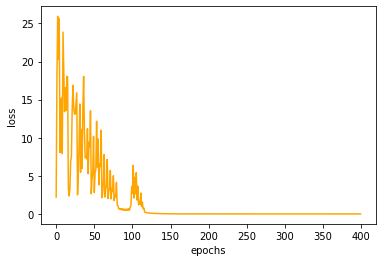

In [ ]:
losses = hist.history["loss"][:400]
accuracy = hist.history["accuracy"][:400]
x_axis = np.arange(0,1000,1)[:400]
sns.lineplot(x=x_axis, y=losses, color = "orange")
plt.xlabel("epochs")
plt.ylabel("loss");

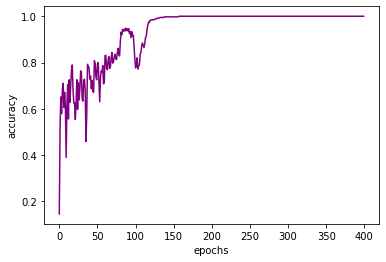

In [ ]:
sns.lineplot(x=x_axis, y=accuracy, color = "purple")
plt.xlabel("epochs")
plt.ylabel("accuracy");

### 3. Mostrar la confusion matrix.

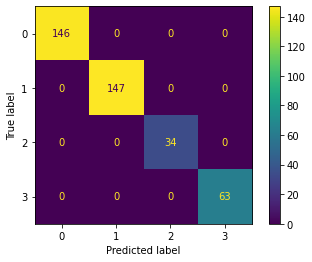

In [ ]:
y_predicted = [int(np.where(output == np.max(output))[0]) for output in model_prostata.predict(norm_inputs)]
cm = metrics.confusion_matrix(targets, y_predicted, labels=[0, 1, 2, 3])
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()

## MNIST, Fashion-MNIST

NIST y FASHION-MNIST son bases de datos de similares caracerísticas (imágenes
de 28 × 28 en escala de grises, 10 clases, 60K muestras de entrenamiento y 10K de
testeo), una de dígitos y la otra de ropa. En el caso de MNIST los labels representan el
dígito, mientras que en la versión FASHION los labels son:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

### 1.

Ambas bases de datos se encuentran en Keras. Pueden ser cargadas como:
```
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
```
cambiando mnist por fashion_mnist cuando corresponda. Explore los datos de
ambas dataset con el siguiente código:
```
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(text_labels[train_labels[img_index]])
```
donde text_labels es una lista de strings con las etiquetas correspondientes. Explique brevemente que hace el código.

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


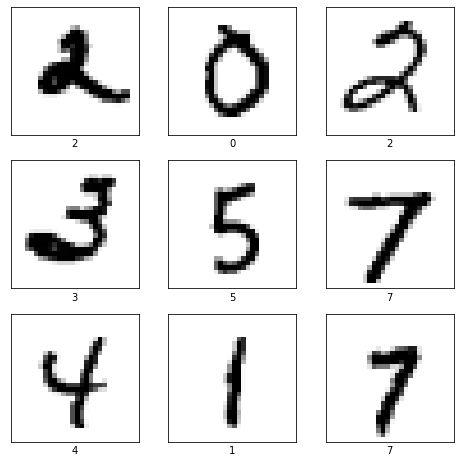

In [3]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(fashion_train_images, fashion_train_labels), (fashion_test_images, fashion_test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


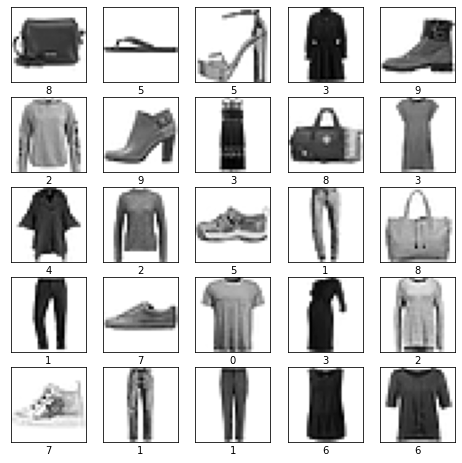

In [5]:
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(fashion_train_images[img_index], cmap="gray_r")
  plt.xlabel(fashion_train_labels[img_index])

Ambos códigos nos permiten generar una imagen que nos da un resumen del dataset. 
- Con ```plt.xticks()``` y ```plt.yticks()``` escogemos si queremos marcas en los ejes (en este caso, los ejes de las imágenes. 
- Usando ```plt.grid()``` decidimos si queremos mostrar una grilla.
- ```img_index = np.random.randint(0, train_images.shape[0])``` selecciona una posición aleatoria en los vectores de imágenes.
- ``` plt.imshow()``` muestra una matriz como imagen.
- ```plt.xlabel()``` nos permite poner un label horizontal a cada plot. 


In [6]:
np.shape(train_images[0]), np.shape(train_images)

((28, 28), (60000, 28, 28))

In [7]:
np.shape(fashion_train_images[0]), np.shape(fashion_train_images)

((28, 28), (60000, 28, 28))

Vemos que, en esencia, *train_images* y *fashion_train_images* son vectores de matrices, en los que en cada posición hay imagen.

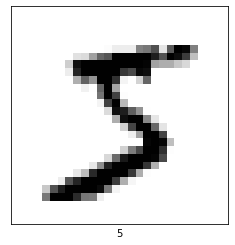

In [8]:
plt.imshow(train_images[0], cmap="gray_r")
plt.xticks([])
plt.yticks([])
plt.xlabel(train_labels[0]);

### 2.

Normalice los datos antes de entrenar y lleve las imágenes a un vector. ¿Qué dificultades encontró?

Como observamos en el apartado anterior, el dataset tiene la forma de un vector de imágenes, en el que cada posición es una matriz que contiene los datos de una imagen. Lo que buscamos es que cada una de esas matrices pasen a ser vectores fila.

In [9]:
# Empezamos tomando una imagen cualquiera y transformándola en vector
np.shape(train_images)

(60000, 28, 28)

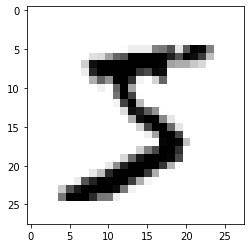

In [10]:
rows = np.shape(train_images)[1]**2
columna_test = train_images[0].reshape(rows,1)
plt.imshow(columna_test.reshape(28,28), cmap = "gray_r")

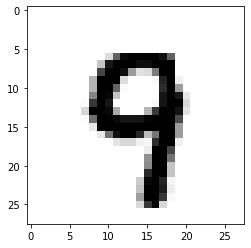

In [11]:
# Le aplicamos la misma transformación a todo el dataset, y lo guardamos en un array.
images_as_vectors = np.array([np.squeeze(image.reshape(1,rows)) for image in train_images])
plt.imshow(images_as_vectors[520].reshape(28,28), cmap = "gray_r");

Ahora que tenemos todo transformado correctamente a una matriz de $\mathbb{R}^{600 \times 28^2}$, donde $28^2$ es el número de elementos en la matriz de cada imagen del *MNIST*, y *600* es el número de imágenes, podemos normalizar el dataset.

In [12]:
scaler = preprocessing.StandardScaler().fit(images_as_vectors)
norm_inputs = scaler.transform(images_as_vectors)

# Seleccionamos también los targets para cuando entrenemos el modelo
targets = train_labels.copy().reshape(len(train_labels), 1)

np.mean(norm_inputs[:,0]), np.std(norm_inputs[:,70])

(0.0, 1.0000000000001927)

Repetimos todo el proceso para *fashion-MNIST*

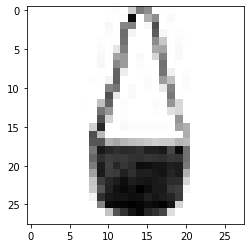

In [13]:
rows = np.shape(fashion_train_images)[1]**2
fashion_images_as_vectors = np.array([np.squeeze(image.reshape(1,rows)) for image in fashion_train_images])
plt.imshow(fashion_images_as_vectors[520].reshape(28,28), cmap = "gray_r");

In [14]:
scaler = preprocessing.StandardScaler().fit(fashion_images_as_vectors)
norm_fashion_inputs = scaler.transform(fashion_images_as_vectors)

# Seleccionamos también los targets para cuando entrenemos el modelo
fashion_targets = fashion_train_labels.copy().reshape(len(fashion_train_labels), 1)

np.mean(norm_fashion_inputs[:,0]), np.std(norm_fashion_inputs[:,70])

(2.7237471537470508e-18, 0.9999999999998685)

Tuve algunas dificultades iniciales al pasar los vectores a columna, porque numpy por defecto realiza el reshape de matrices a matrices, de ahi que en la comprehension utilice ```np.shrink()``` 

### 3.

Programar con keras el GD para cada base de datos (dos códigos independientes)
usando GPU. Indicar el learning rate, el patience del early stopping. También
indicar el riesgo y el accuracy alcanzado tanto para el conjunto de entrenamiento
como el de testeo.

In [15]:
# primero el MNIST. Inicializamos el modelo
model_mnist = tf.keras.Sequential()
model_mnist.add(tf.keras.layers.Dense(10, input_dim = rows, activation = "softmax"))
model_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [16]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model_mnist.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=["accuracy"])
hist = model_mnist.fit(x=norm_inputs, y=targets, batch_size = 128, epochs=300,callbacks=[early_stop]);

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


469/469 [==============================] - 4s 2ms/step - loss: 0.4298 - accuracy: 0.8946
Epoch 2/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.9141
Epoch 3/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.9167
Epoch 4/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.9193
Epoch 5/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.9210
Epoch 6/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3209 - accuracy: 0.9217
Epoch 7/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.9221
Epoch 8/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.9219
Epoch 9/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3114 - accuracy: 0.9226
Epoch 10/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3148 - accuracy: 0.9236
E

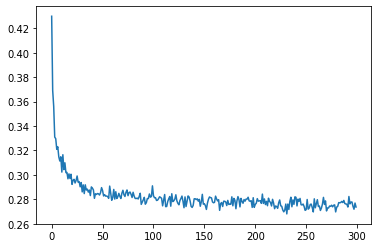

In [17]:
losses = hist.history["loss"]
sns.lineplot(x = np.arange(0,len(losses),1), y=losses);

In [22]:
model_fashion_mnist = tf.keras.Sequential()
model_fashion_mnist.add(tf.keras.layers.Dense(10, input_dim = rows, activation = "softmax"))
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)
model_fashion_mnist.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          metrics=["accuracy"])
hist = model_fashion_mnist.fit(x=norm_fashion_inputs, y=fashion_targets, batch_size = 128, epochs=300,callbacks=[early_stop]);

Epoch 1/300
469/469 [==============================] - 2s 2ms/step - loss: 0.5530 - accuracy: 0.8121
Epoch 2/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4530 - accuracy: 0.8456
Epoch 3/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4340 - accuracy: 0.8507
Epoch 4/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8541
Epoch 5/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8565
Epoch 6/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4092 - accuracy: 0.8592
Epoch 7/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4042 - accuracy: 0.8606
Epoch 8/300
469/469 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8611
Epoch 9/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3978 - accuracy: 0.8630
Epoch 10/300
469/469 [==============================] - 1s 2ms/step - loss: 0.3957 - accura

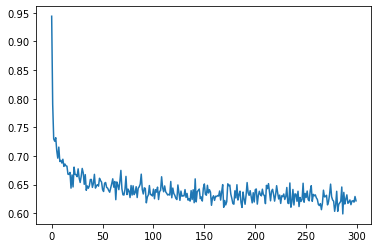

In [19]:
losses = hist.history["loss"]
sns.lineplot(x = np.arange(0,len(losses),1), y=losses);